In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:

def _find_signal_peaks(osc_screen, threshold, offset=0):
    # TODO: calibrate this
    peaks = np.where(np.diff(osc_screen) > threshold)[0]
    sampling_rate = 125e6
    return peaks/sampling_rate + offset

def _count_photons(osc_screen):
    # TODO: save threshold in configuration.
    times = _find_signal_peaks(-osc_screen, 0.5)
    return len(times)

def find_edges(data, threshold, kernel=(1,-1), clean=True):
    dd = np.convolve(data, kernel)
    edges = np.where(dd < threshold)[0]

    if clean:
        e_prev=0
        for i, e in enumerate(edges):
            if e-e_prev < 2:
                edges[i] = -1
            e_prev = e
        edges = edges[edges >= 0]
    return edges

In [14]:
minwl, maxwl = 400, 700
spectrum = np.zeros(maxwl - minwl)
for i, wl in enumerate(range(minwl, maxwl)):
    counts = 0
    for j in range(76):
        df = pd.read_pickle(f'/home/tomi/Documents/academicos/facultad/tesis/tesis/data/27-03/exp_1/spectrum/{wl}/{str(j).zfill(3)}.pickle')
        #counts += _count_photons(df["ch1"])
        counts += len(find_edges(df["ch1"], -1))
    spectrum[i] = counts


In [15]:
%matplotlib widget

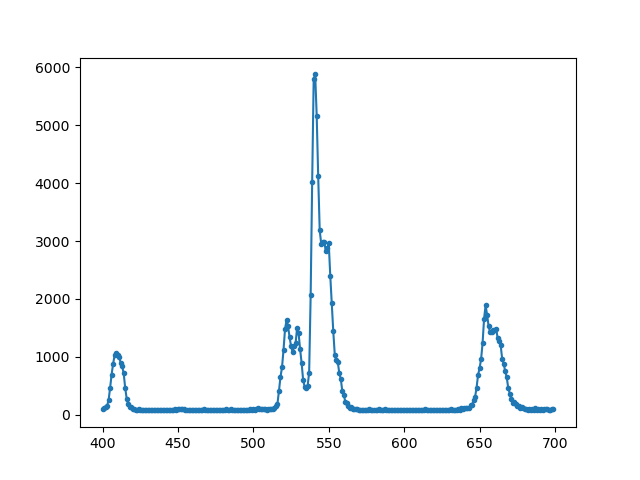

In [16]:
plt.close('all')
plt.plot(np.arange(minwl, maxwl, 1), spectrum, '.-')
plt.show()